# Intermediate Level Python

## A briefing on more advanced features of Python

This section assumes you're up to speed on the foundations - and now we cover some important features of python that we use on the course.

1. Comprehensions  
2. Generators  
3. Sub-classes, Type Hints, Pydantic  
4. Decorators
5. Docker (not really python, but we use it to run python code!)


In [18]:
# First let's create some things:

fruits = ["Apples", "Bananas", "Pears"]

book1 = {"title": "Great Expectations", "author": "Charles Dickens"}
book2 = {"title": "Bleak House", "author": "Charles Dickens"}
book3 = {"title": "An Book By No Author"}
book4 = {"title": "Moby Dick", "author": "Herman Melville"}

books = [book1, book2, book3, book4]

# Part 1: List and dict comprehensions

In [19]:
# Simple enough to start

for fruit in fruits:
    print(fruit)

Apples
Bananas
Pears


In [20]:
# Let's make a new version of fruits

fruits_shouted = []
for fruit in fruits:
    fruits_shouted.append(fruit.upper())

fruits_shouted

['APPLES', 'BANANAS', 'PEARS']

In [21]:
# You probably already know this
# There's a nice Python construct called "list comprehension" that does this:

fruits_shouted2 = [fruit.upper() for fruit in fruits]
fruits_shouted2

['APPLES', 'BANANAS', 'PEARS']

In [22]:
# But you may not know that you can do this to create dictionaries, too:

fruit_mapping = {fruit: fruit.upper() for fruit in fruits}
fruit_mapping

{'Apples': 'APPLES', 'Bananas': 'BANANAS', 'Pears': 'PEARS'}

In [23]:
# you can also use the if statement to filter the results

fruits_with_longer_names_shouted = [fruit.upper() for fruit in fruits if len(fruit)>5]
fruits_with_longer_names_shouted

['APPLES', 'BANANAS']

In [24]:
fruit_mapping_unless_starts_with_a = {fruit: fruit.upper() for fruit in fruits if not fruit.startswith('A')}
fruit_mapping_unless_starts_with_a

{'Bananas': 'BANANAS', 'Pears': 'PEARS'}

In [25]:
# Another comprehension

[book['title'] for book in books]

['Great Expectations', 'Bleak House', 'An Book By No Author', 'Moby Dick']

In [26]:
# This code will fail with an error because one of our books doesn't have an author

[book['author'] for book in books]

KeyError: 'author'

In [ ]:
# But this will work, because get() returns None

[book.get('author') for book in books]

['Charles Dickens', 'Charles Dickens', None, 'Herman Melville']

In [ ]:
# And this variation will filter out the None

[book.get('author') for book in books if book.get('author')]

['Charles Dickens', 'Charles Dickens', 'Herman Melville']

In [ ]:
# And this version will convert it into a set, removing duplicates

set([book.get('author') for book in books if book.get('author')])

{'Charles Dickens', 'Herman Melville'}

In [ ]:
# And finally, this version is even nicer
# curly braces creates a set, so this is a set comprehension

{book.get('author') for book in books if book.get('author')}

{'Charles Dickens', 'Herman Melville'}

# Part 2: Generators
Generators allow you to iterate over data without creating a complete list in memory. <br>
Instead, they generate or yield values one at a time as you need them.

The yield keyword is the core of a generator. When a function has yield instead of return, it becomes a generator function. 

Each time generator is called: 
- yields one value to the caller.
- it pauses the function
- saving its state


Q. what is the main advantage of generators?<br>
A. you do not need to keep all the values in the memory. so when you are working with a large data and you want to go through them, you do not need to load all the data into memory, then you load one value or one chunck of data at a time.<br>
so you can use generator as a memory efficient data loader or chunking strategy.

---


We use Generators in the course because AI models can stream back results.

If you've not used Generators before, please start with this excellent intro from ChatGPT:

https://chatgpt.com/share/672faa6e-7dd0-8012-aae5-44fc0d0ec218

Try pasting some of its examples into a cell.

In [ ]:
# First define a generator; it looks like a function, but it has yield instead of return

import time

def come_up_with_fruit_names():
    for fruit in fruits:
        time.sleep(1) # thinking of a fruit
        yield fruit

In [ ]:
# create a generator object
come_up_with_fruit_names_ = come_up_with_fruit_names()

# ask for the next value with next method 
print(next(come_up_with_fruit_names_))
print(next(come_up_with_fruit_names_))
print(next(come_up_with_fruit_names_))
print(next(come_up_with_fruit_names_))

Apples
Bananas
Pears


StopIteration: 

In [ ]:
# best practice to use generators

# create a generator object
come_up_with_fruit_names_ = come_up_with_fruit_names()

# Then use it in a for loop
for fruit in come_up_with_fruit_names_:
    print(fruit)

Apples
Bananas
Pears


Q. can I use generator as a chnking strategy in python when you are handling large data?
A. Yes — using a generator is actually one of the best strategies for chunking and streaming large data in Python.

When you have a huge dataset (like a massive CSV file, database results, or log files) that cannot fit into memory, a generator lets you yield chunks one at a time instead of loading the entire dataset.

## chunking generator for pandas dataframe
You can absolutely build a chunking generator that yields slices of a large pandas DataFrame without loading all chunks into memory at once.

In [ ]:
import pandas as pd

def dataframe_chunker(df: pd.DataFrame, chunk_size: int):
    """Yield successive chunks from a DataFrame."""
    num_rows = df.shape[0]
    for start in range(0, num_rows, chunk_size):
        end = min(start + chunk_size, num_rows)
        yield df.iloc[start:end]

In [ ]:
# Example Usage

# Example: simulate a large DataFrame
data_size = 111
data = {
    "id": range(1, data_size),   # 1,000,010 rows
    "name": ["name_" + str(i) for i in range(1, data_size)],
    "job": ["job_" + str(i % 5) for i in range(1, data_size)]
}
df = pd.DataFrame(data)

# create generator object
dataframe_chunker_ = dataframe_chunker(df, chunk_size=10)
for i, chunk in enumerate(dataframe_chunker_, start=1):
    print(f"Chunk {i}: shape={chunk.shape}")

Chunk 1: shape=(10, 3)
Chunk 2: shape=(10, 3)
Chunk 3: shape=(10, 3)
Chunk 4: shape=(10, 3)
Chunk 5: shape=(10, 3)
Chunk 6: shape=(10, 3)
Chunk 7: shape=(10, 3)
Chunk 8: shape=(10, 3)
Chunk 9: shape=(10, 3)
Chunk 10: shape=(10, 3)
Chunk 11: shape=(10, 3)


# Exercise

Write some python classes for the books example.

Write a Book class with a title and author. Include a method has_author()

Write a BookShelf class with a list of books. Include a generator method unique_authors()

# Part 3: Sub-classes, Type Hints, Pydantic

#### Q: Why do we need Pydantic?  

**A:** Python uses **dynamic typing** instead of static typing, which leads to some potential issues:  

- When you create a variable, you do not specify its type.  
- You can overwrite (reassign) variables with different data types.  
- Python allows you to accidentally create an invalid object with the wrong data types — the object is created successfully, but it may fail later at runtime.  


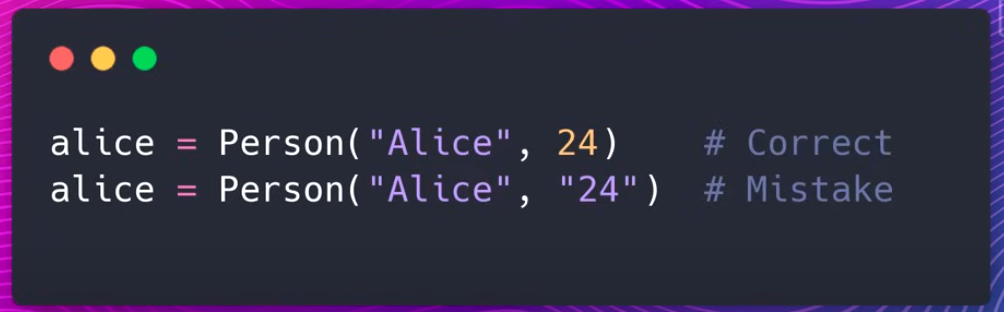

#### Q: What is Pydantic and how does it solve these issues?  

**A:** Pydantic is a **data validation** and **type hinting** library for Python.  
It lets you define models with explicit types, ensuring that:  

- Your data is validated automatically against the declared types.  
- Invalid or mismatched data raises errors immediately, instead of failing later at runtime.  
- You can work with strongly typed objects while still benefiting from Python’s flexibility.  

youtube tutorial [link](https://www.youtube.com/watch?v=XIdQ6gO3Anc)


#### Q: How do you use Pydantic?  

**A:** To use Pydantic, you:  

1. Create a class that **inherits from `BaseModel`**.  
2. Define your variables as **class attributes** with their expected types.  

This allows Pydantic to automatically validate data and enforce type constraints when you create instances of the class.


In [35]:
from pydantic import BaseModel
from typing import List

Q. why you do not get error whe you run the code block below?<br>
A. Why it happens? In Pydantic v1 (and also v2, unless configured otherwise), the library doesn’t only validate types, it also tries to coerce/convert values into the expected type whenever possible.

In [40]:
# correct data type
class User(BaseModel):
    name: str
    email: str
    account_id: List[int]

user = User(name="jack", email="jack@pixegami.io", account_id=["10"])
print(user.name)
print(user.account_id)
print(type(user.account_id))

jack
[10]
<class 'list'>


Q. now How to make it raise an error instead?<br>
If you want strict validation (no coercion), you need to tell Pydantic explicitly.

In [ ]:
from pydantic import BaseModel, StrictInt, ConfigDict

class User(BaseModel):
    model_config = ConfigDict(strict=True)  # globally strict
    name: str
    email: str
    account_id: int

user = User(name="jack", email="jack@pixegami.io", account_id="10")
print(user.name)


ValidationError: 1 validation error for User
account_id
  Input should be a valid integer [type=int_type, input_value='10', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/int_type

In [ ]:

# wrong data type error, you can an error becuase it cannot convert "hello" to int
class User(BaseModel):
    name: str
    email: str
    account_id: int

user = User(name="jack", email="jack@pixegami.io", account_id="hello")
print(user.name)

ValidationError: 1 validation error for User
account_id
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='hello', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/int_parsing

In [ ]:
# builtin data type validation from pydantic, e.g. EmailStr here

from pydantic import BaseModel, EmailStr

class User(BaseModel):
    name: str
    email: EmailStr
    account_id: int

user = User(name="jack", email="jack@gmail.com", account_id=1234)
print(user.name)

ImportError: email-validator is not installed, run `pip install pydantic[email]`

In [ ]:
# custom data type validation using pydantic and a class method
from pydantic import BaseModel, field_validator
from typing import Union

class User(BaseModel):
    name: str
    email: str  # Assuming EmailStr type
    account_id: int
    
    @field_validator("account_id")
    @classmethod
    def validate_account_id(cls, value):
        if value <= 0:
            raise ValueError(f"account_id must be positive: {value}")
        return value

# Example usage
user = User(name="jack", email="jack@pixegami.io", account_id=-10)
print(user)

ValidationError: 1 validation error for User
account_id
  Value error, account_id must be positive: -10 [type=value_error, input_value=-10, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error



Here are some intermediate level details of Classes from our AI friend, including use of type hints, inheritance and class methods. This includes a Book example.

https://chatgpt.com/share/67348aca-65fc-8012-a4a9-fd1b8f04ba59

And here is a comprehensive tutorial on Pydantic classes covering everything you need to know about Pydantic.

https://chatgpt.com/share/68064537-6cfc-8012-93e1-f7dd0932f321

In [ ]:
from pydantic import BaseModel

### 🧩 Table of Built-in Pydantic Type Validations

| **Category** | **Type / Annotation** | **Description** | **Example Usage** |
|---------------|----------------------|------------------|-------------------|
| **Core Python Data Types** | `str` | Validates and coerces to string | `"hello"` |
|  | `int` | Validates and coerces to integer | `42` |
|  | `float` | Validates and coerces to float | `3.14` |
|  | `bool` | Boolean coercion (truthy/falsey) | `True`, `False`, `"yes"` |
|  | `bytes` | Byte string | `b"data"` |
|  | `None` / `Optional[...]` | Allows `None` values | `Optional[int]` |
|  | `dict`, `list`, `set`, `frozenset`, `tuple` | Basic Python containers | `List[int]`, `Dict[str, float]` |
| **Typing Module Collections** | `List[T]` | List of specified type | `List[int]` |
|  | `Tuple[T1, T2, ...]` | Fixed-length tuple | `Tuple[int, str]` |
|  | `Dict[K, V]` | Key/value dictionary | `Dict[str, float]` |
|  | `Set[T]` | Unordered unique elements | `Set[str]` |
|  | `Union[A, B]` | Accepts multiple types | `Union[int, str]` |
|  | `Literal[...]` | Restricts to specific constant values | `Literal["A", "B"]` |
|  | `Annotated[T, Field(...)]` | Adds metadata/constraints (Pydantic v2) | `Annotated[int, Field(gt=0)]` |
| **Date & Time Types** | `datetime.datetime` | Full date & time | `"2025-10-14T12:00:00"` |
|  | `datetime.date` | Date only | `"2025-10-14"` |
|  | `datetime.time` | Time only | `"12:30:00"` |
|  | `datetime.timedelta` | Duration | `"1 day, 2:00:00"` |
| **Numeric Types** | `Decimal` | High-precision decimal | `"10.50"` |
|  | `UUID` | Universally unique identifier | `"550e8400-e29b-41d4-a716-446655440000"` |
|  | `conint`, `confloat`, `condecimal` | Constrained numeric types (v1) | `conint(gt=0, lt=100)` |
|  | `Field(gt=..., lt=...)` | Field-based numeric constraints (v2) | `Field(gt=0, le=100)` |
| **Network & Email Types** | `AnyUrl`, `HttpUrl`, `FileUrl`, `PostgresDsn`, etc. | Validates URLs and DSNs | `"https://example.com"` |
|  | `EmailStr` | Validates email addresses | `"user@example.com"` |
|  | `IPvAnyAddress`, `IPv4Address`, `IPv6Address` | Valid IP addresses | `"192.168.1.1"` |
|  | `IPvAnyNetwork`, `IPvAnyInterface` | IP network/interface validation | `"192.168.1.0/24"` |
| **Path & File Types** | `Path` | Any valid `pathlib.Path` | `"/tmp/file.txt"` |
|  | `FilePath` | Must point to an existing file | `"/etc/hosts"` |
|  | `DirectoryPath` | Must point to an existing directory | `"/usr/local"` |
|  | `Json` | Valid JSON string | `'{"key": "value"}'` |
| **Pydantic-Specific Types** | `SecretStr`, `SecretBytes` | Hidden/obfuscated strings | `SecretStr("mypassword")` |
|  | `PaymentCardNumber` | Valid credit/debit card number | `"4111111111111111"` |
|  | `Color` | HTML/CSS color value | `"red"`, `"#FF0000"` |
|  | `NameEmail` | Combined name and email | `"John Doe <john@example.com>"` |
| **Constrained Types** | `constr` | String with min/max length or regex | `constr(min_length=3, regex=r"^[A-Z]+$")` |
|  | `conlist`, `conset` | Constrained list or set size | `conlist(int, min_items=1, max_items=10)` |
|  | `Field(min_length=..., max_length=..., pattern=...)` | Unified constraints (v2) | `Field(min_length=2, pattern=r"^[a-z]+$")` |
| **Advanced / Miscellaneous** | `BaseModel` | Nested model validation | `class User(BaseModel): ...` |
|  | `Enum`, `IntEnum` | Enumerated constant values | `Enum("Color", ["RED", "BLUE"])` |
|  | `Pattern` | Regex pattern validation | `Pattern("^abc")` |
|  | `JsonValue` | Valid JSON-serializable value | `[1, "two", 3.0]` |

---

### 🧠 Notes

- In **Pydantic v2**, `Field()` replaces most of the old `con*` constrained types.  
- Validators such as `@field_validator` or `@model_validator` can extend or override validation logic.  
- Pydantic automatically coerces compatible values (e.g., `"123"` → `123` for `int`).  


## Part 4: Decorators

Here is a briefing, with an example from OpenAI Agents SDK:

https://chatgpt.com/share/6806474d-3880-8012-b2a2-87b3ee4489da

# Python Decorators: From Basics to Advanced

Python decorators are a powerful tool that allow you to **modify or extend the behavior of functions or classes** without permanently changing their code. They’re widely used in Python frameworks, APIs, and libraries, so understanding them is crucial for progressing from beginner to intermediate Python skills.

---

## **Part 1: Defining a Decorator**

### What is a Decorator?

A decorator is essentially **a function that takes (wraps) another function and extends or changes its behavior** without explicitly changing the original function.

Think of it like gift wrapping a present: the gift (function) is still the same, but the wrapper (decorator) adds extra features.

#### Why Use Decorators?

1. **Code Reusability**: Apply the same behavior to multiple functions without repeating code.
2. **Separation of Concerns**: Keep your business logic clean while adding logging, validation, or authorization.
3. **Framework Integration**: Many frameworks rely on decorators (`@app.route` in Flask, `@classmethod` in Python, `@function_tool` in OpenAI SDK).

---

### Anatomy of a Simple Decorator

```python
def decorator(func):
    def wrapper(*args, **kwargs):
        print("Before function call")
        result = func(*args, **kwargs)
        print("After function call")
        return result
    return wrapper
```

- `func` is the function being decorated.
- `wrapper` is the new function that adds extra behavior.
- Returning `wrapper` replaces the original function with the wrapped version.

---

### Using a Decorator

```python
def say_hello():
    print("Hello!")

# Apply decorator manually
decorated_function = my_decorator(say_hello)
decorated_function()

# Output:
# Something is happening before the function is called.
# Hello!
# Something is happening after the function is called.
```

Or using the **syntactic sugar** `@`:

```python
@my_decorator
def say_hello():
    print("Hello!")

say_hello()
```

> ✅ The `@my_decorator` line is equivalent to: `say_hello = my_decorator(say_hello)`

---

## **Part 2: Simple Examples – @classmethod and @staticmethod**

Python provides several **built-in decorators** for classes:

### **1. @classmethod**

A `@classmethod` receives the class as the first argument instead of an instance.

```python
class MyClass:
    counter = 0

    def __init__(self):
        MyClass.counter += 1

    @classmethod
    def how_many_instances(cls):
        return cls.counter

a = MyClass()
b = MyClass()
print(MyClass.how_many_instances())  # Output: 2
```

- `cls` refers to the class itself.
- Useful for factory methods or tracking class-level data.

---

### **2. @staticmethod**

A `@staticmethod` **does not receive `self` or `cls`**. It’s just a function that lives inside the class.

```python
class Math:
    @staticmethod
    def add(x, y):
        return x + y

print(Math.add(3, 5))  # Output: 8
```

- Use `@staticmethod` for utility functions related to the class but that don’t need class or instance data.

---

### Key Differences

| Feature           | @staticmethod | @classmethod      | Instance method |
|------------------|---------------|-----------------|----------------|
| Receives `self`   | ❌            | ❌               | ✅             |
| Receives `cls`    | ❌            | ✅               | ❌             |
| Can access class vars | ❌        | ✅               | ✅             |

---

## **Part 3: More Advanced Examples**

### Custom Behavior – OpenAI Agents SDK Example: `@function_tool`

Some libraries use decorators to **convert functions into specialized tools**. For example, in the OpenAI Agents SDK:

```python
from openai.agents import tool

@tool
def greet(name: str) -> str:
    return f"Hello, {name}!"
```

- Here, `@tool` wraps `greet` and turns it into a "tool" that the agent can call.
- Behind the scenes, it may register the function, enforce argument validation, or add logging.

---

### Logging Decorator Example

```python
def log_calls(func):
    def wrapper(*args, **kwargs):
        print(f"Calling {func.__name__} with args={args} kwargs={kwargs}")
        result = func(*args, **kwargs)
        print(f"{func.__name__} returned {result}")
        return result
    return wrapper

@log_calls
def multiply(x, y):
    return x * y

multiply(3, 4)
```

**Output:**
```
Calling multiply with args=(3, 4) kwargs={}
multiply returned 12
```

> Notice the use of `*args` and `**kwargs` – this makes decorators flexible for any function signature.

---

## **Part 4 (Advanced & Optional): How Decorators Work Behind the Scenes**

Decorators are just **higher-order functions**: functions that take other functions as input and return a function.

### Manual Implementation

```python
def uppercase_decorator(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        return result.upper()
    return wrapper


def say_name(name):
    return f"My name is {name}"

say_name = uppercase_decorator(say_name)
print(say_name("Alice"))  # Output: "MY NAME IS ALICE"
```

Using `@` syntax:

```python
@uppercase_decorator
def say_name(name):
    return f"My name is {name}"

print(say_name("Bob"))  # Output: "MY NAME IS BOB"
```

---

### Nested Decorators

You can apply **multiple decorators**:

```python
@log_calls
@uppercase_decorator
def greet(name):
    return f"Hello {name}"

greet("Eve")
```

**Order matters:** decorators are applied **bottom to top**.

- First: `uppercase_decorator(greet)`
- Then: `log_calls(...)`

---

### Using `functools.wraps` to Preserve Metadata

Without it, the wrapper function loses the original function’s name and docstring:

```python
from functools import wraps

def log_calls(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f"Calling {func.__name__}")
        return func(*args, **kwargs)
    return wrapper
```

- Always use `@wraps(func)` when creating decorators for cleaner introspection.

---

### Quick Summary Table

| Concept                   | Example / Purpose                                  |
|----------------------------|--------------------------------------------------|
| Function decorator         | `@my_decorator` wraps a function                 |
| Class method               | `@classmethod` – receives class as first arg    |
| Static method              | `@staticmethod` – no instance or class          |
| Advanced decorator         | `@tool` in OpenAI SDK – converts function to tool |
| Preserve metadata          | `functools.wraps`                                 |

---

### ✅ Key Takeaways

1. Decorators **wrap functions** to add functionality.
2. Built-in decorators like `@classmethod` and `@staticmethod` simplify common patterns.
3. Custom decorators are widely used for logging, validation, and API integration.
4. Use `*args` and `**kwargs` for flexible decorators.
5. `functools.wraps` preserves metadata for clean debugging and documentation.



## Part 5: Docker

Here is a convenient tutorial to introduce Docker.

In the last section, this also covers an answer to a question in Week 6 - what does it mean to run an MCP server in Docker? But you can ignore this question if you're not on week 6 yet.

https://chatgpt.com/share/6814bc1d-2f3c-8012-9b18-dddc82ea421b

In [ ]:
# You need to install docker to run this example
# This will download the Docker image for python 3.12, create a container,
# Run some python code and print the result

!docker run --rm python:3.12 python -c "print(2 + 2)"